In [2]:
pip install faiss-cpu transformers torch torchvision


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\aasis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import faiss
import torch
import json
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from torchvision import models, transforms
from PIL import Image
import numpy as np
import os
import pickle
from IPython.display import display

In [4]:
image_dir=r"D:\Sem7-project-folders\augmented_dataset\augmented_dataset"
json_path=r"D:\phase2\fiass\description_108.json"
for_displaying_image=r"D:\phase2\fiass\Full_108\saved_images_108"

In [5]:
faiss_index_path = r"D:\phase2\fiass\Full_108\Karana.index"
metadata_path = r"D:\phase2\fiass\Full_108\metadata.pth"

In [6]:
# Function to convert a query text to an embedding
def query_to_embedding(query_text):

    # Convert the query text to an embedding with truncation to max length
    inputs = tokenizer(query_text, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        query_embedding = text_model(**inputs).last_hidden_state.mean(dim=1).squeeze().numpy()
    return query_embedding

Closest Text Index: 97
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Uromandalam/img1.jpg
Rank 1: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Uromandalam/img1.jpg, Distance: 31.865070343017578


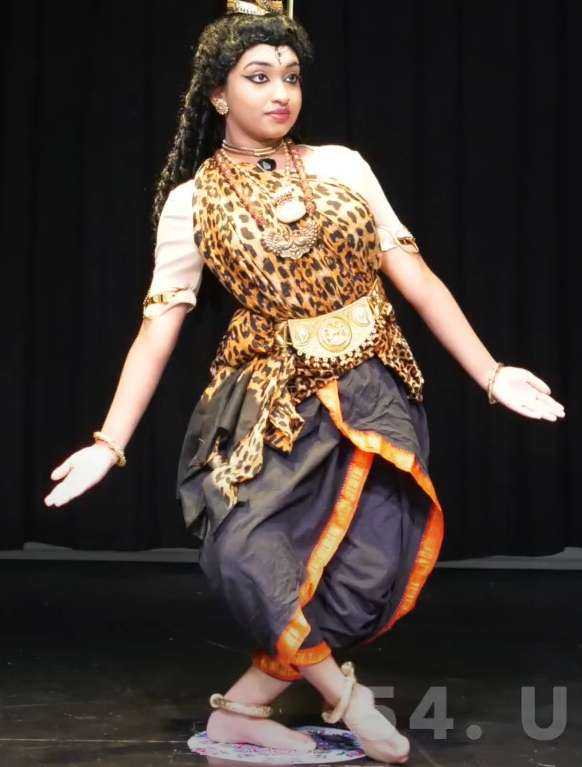

Closest Text Index: 50
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Argalam/img1.jpg
Rank 2: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Argalam/img1.jpg, Distance: 33.65287780761719


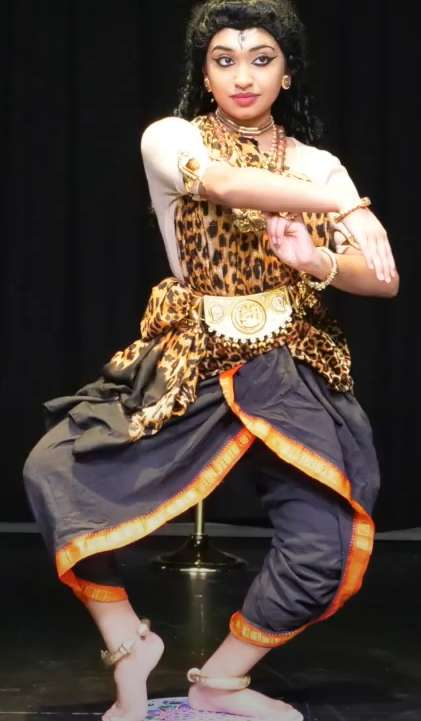

Closest Text Index: 37
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Chaturam/img1.jpg
Rank 3: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Chaturam/img1.jpg, Distance: 34.45230484008789


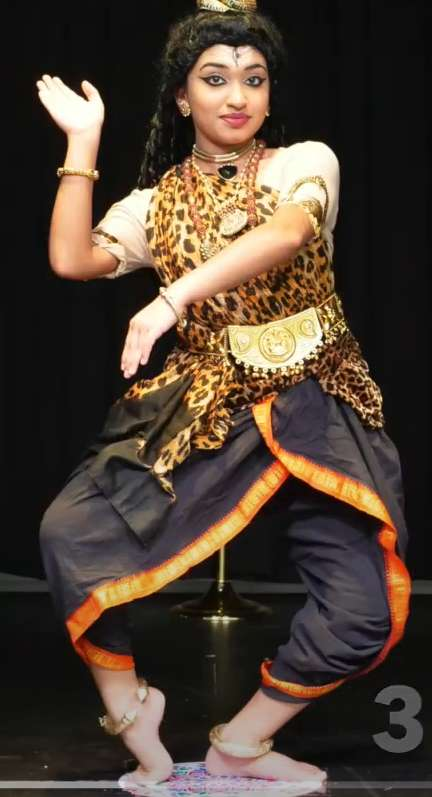

Closest Text Index: 49
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Ardhsoochi/img1.jpg
Rank 4: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Ardhsoochi/img1.jpg, Distance: 34.522247314453125


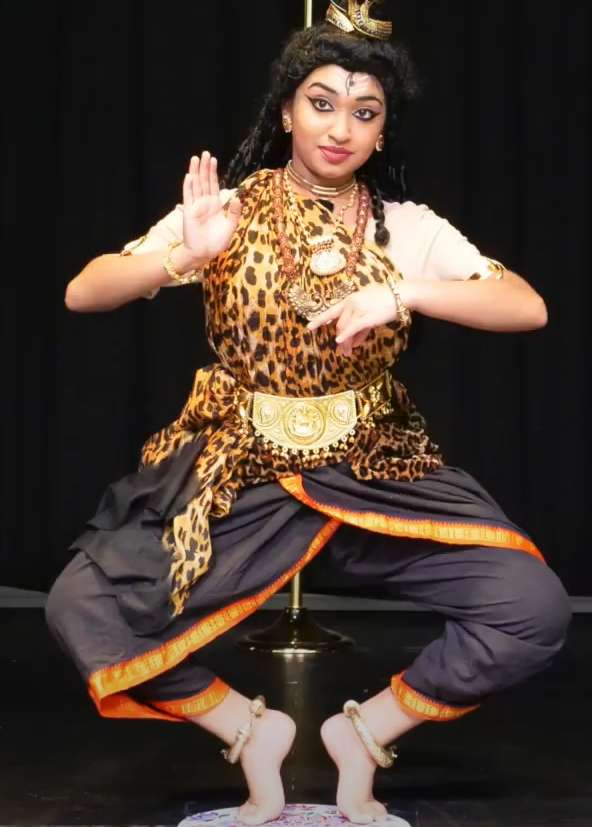

Closest Text Index: 98
Retrieved Path from Metadata: D:\Sem7-project-folders\augmented_dataset\augmented_dataset\Vakshaswastikam/img1.jpg
Rank 5: Image Location: D:/Sem7-project-folders/augmented_dataset/augmented_dataset/Vakshaswastikam/img1.jpg, Distance: 34.673301696777344


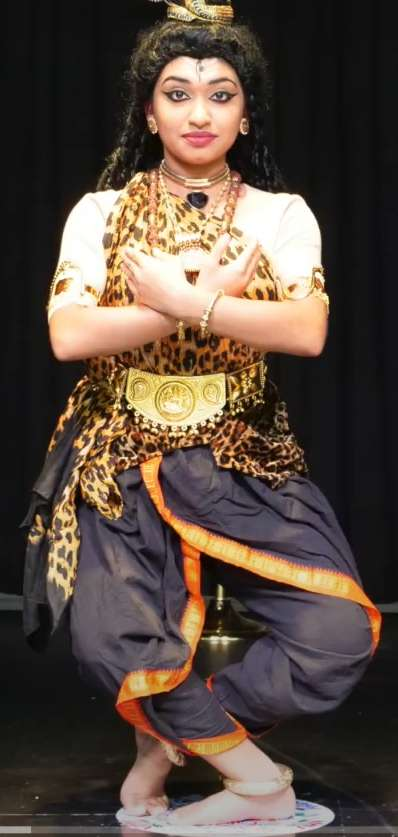

In [14]:
image_dir = r'D:\phase2\fiass\Full_108\saved_images_108'

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
text_model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
text_model.eval()

index = faiss.read_index(faiss_index_path)

metadata = torch.load(metadata_path, map_location="cpu")

def retrieve_top_images_from_text(query_text, k=5):
    # Convert the query to a text vector
    query_embedding = query_to_embedding(query_text)

    # Search Faiss index for the closest k matching text vectors
    D, I = index.search(query_embedding.reshape(1, -1), k=k)

    for rank in range(k):
        closest_text_index = I[0][rank]  # Get the index of the current closest match
        print(f"Closest Text Index: {closest_text_index}")
        distance = D[0][rank]  # Get the corresponding distance score

        # Retrieve the full relative path from metadata
        relative_path = metadata[closest_text_index]
        print(f"Retrieved Path from Metadata: {relative_path}")

        # Construct the full absolute path using `image_dir`
        closest_image_path = os.path.join(image_dir, relative_path).replace("\\", "/")
        print(f"Rank {rank + 1}: Image Location: {closest_image_path}, Distance: {distance}")

        # Load and display the image along with its score
        if os.path.exists(closest_image_path):
            image = Image.open(closest_image_path)
            display(image)  # Display the image inline
        else:
            print(f"Image not found: {closest_image_path}")

# Example usage
query = "Hands near the chest"
retrieve_top_images_from_text(query)
